In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Draw all activation functions

In [217]:
def draw(x, y, x_lim, y_lim, multi = False, label = None):
    fig, ax = plt.subplots()

    # set x and y limits
    xlim = [-x_lim, x_lim]
    ylim = [-y_lim, y_lim]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # draw x and y axes
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')

    # add labels to axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # set ticks and labels for x and y axes
    xticks = np.arange(-x_lim, x_lim + 1, 1)
    yticks = np.arange(-y_lim, y_lim + 1, 1)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([str(x) for x in xticks])
    ax.set_yticklabels([str(y) for y in yticks])

    # add gridlines
    ax.grid(True)
    
    if multi == True:
        for i, y_batch in enumerate(y):
            if label != None:
                plt.plot(x, y_batch, label=label[i])
            else:
                plt.plot(x, y_batch)
        plt.legend()
        
    else:
        plt.plot(x, y)
    
    plt.show()

## Sigmoid

In [142]:
def sigmoid(x):
    return 1 / (1 +  np.exp(-x))

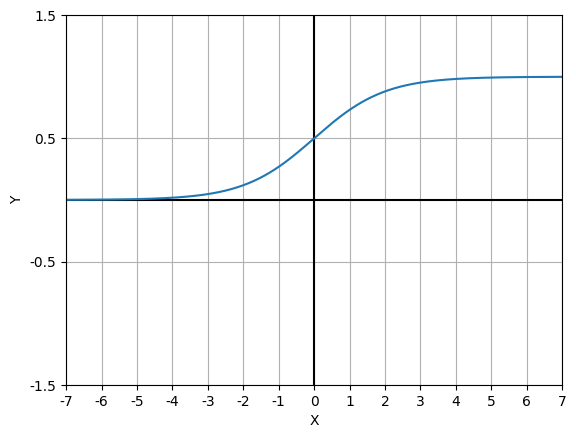

In [228]:
x = np.arange(-10, 10, 0.01)
y = sigmoid(x)

draw(x, y, 7, 1.5)

## Relu

In [148]:
def relu(x):
    return np.maximum(0, x)

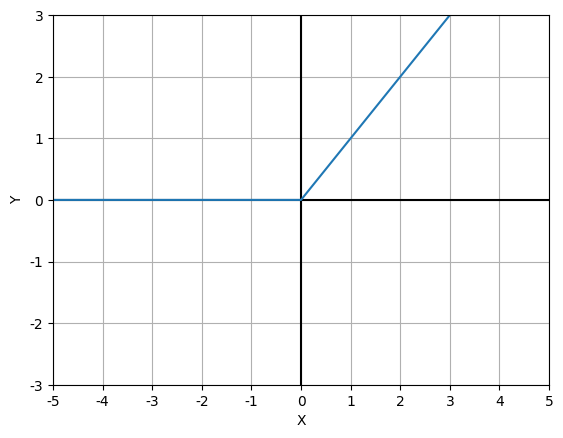

In [230]:
x = np.arange(-7, 7, 0.01)
y = relu(x)

draw(x, y, 5, 3)

## Tanh

In [43]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

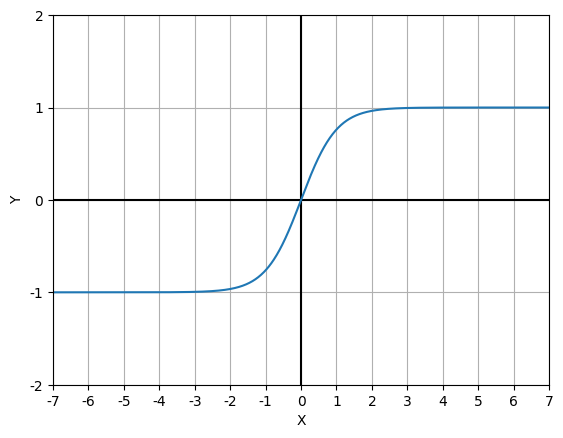

In [232]:
x = np.arange(-10, 10, 0.01)
y = tanh(x)

draw(x, y, 7, 2)

## Leaky Relu

In [266]:
def leaky_relu(x, alpha):
    return [alpha * x_ if x_ <= 0 else x_ for x_ in x]

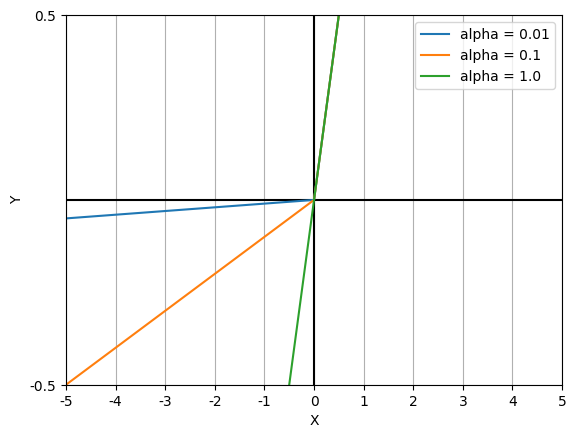

In [282]:
x = np.arange(-7, 7, 0.01)
y = leaky_relu(x, 0.01)
y_1 = leaky_relu(x, 0.1)
y_10 = leaky_relu(x, 1)

draw(x, [y, y_1, y_10], 5, 0.5, multi=True, label = ["alpha = 0.01", "alpha = 0.1", "alpha = 1.0"])

## Swish

In [197]:
def swish(x, beta):
    return x * sigmoid(beta * x)

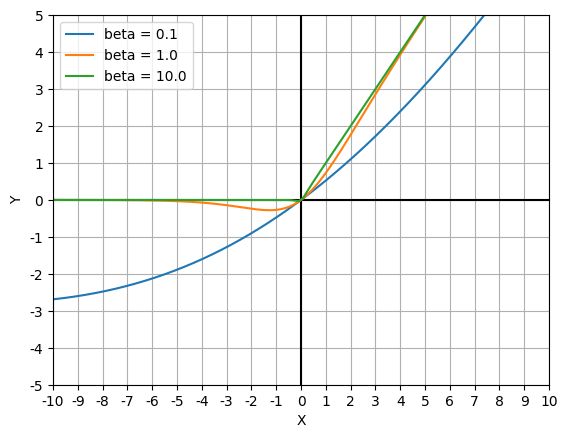

In [239]:
x = np.arange(-10, 10, 0.01)
y = swish(x, 0.1)
y_1 = swish(x, 1)
y_10 = swish(x, 10)

draw(x, [y, y_1, y_10], 10, 5, multi=True, label = ["beta = 0.1", "beta = 1.0", "beta = 10.0"])

## Elu

In [221]:
def elu(X, alpha):
    return [x if x >= 0 else alpha * (np.exp(x) - 1) for x in X]

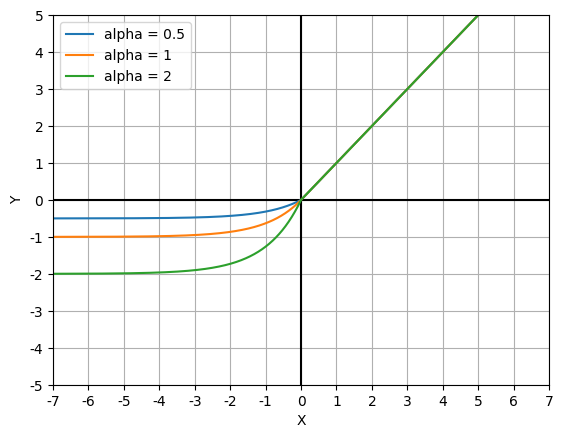

In [247]:
x = np.arange(-10, 10, 0.01)
y = elu(x, 0.5)
y_1 = elu(x, 1)
y_10 = elu(x, 2)

draw(x, [y, y_1, y_10], 7, 5, multi=True, label = ["alpha = 0.5", "alpha = 1", "alpha = 2"])

# Draw all derivatives of these activation functions

In [295]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return [0 if x_ < 0 else 1 for x_ in x]

def tanh_derivative(x):
    return 1 - np.power(tanh(x), 2)

def leaky_relu_derivative(x, alpha):
    return [alpha if x_ <= 0 else 1 for x_ in x]

def swish_derivative(x, beta):
    return swish(x, beta) + sigmoid(x) * (1 - swish(x, beta))

def elu_derivative(x, alpha):
    return [1 if x_ > 0 else alpha * np.exp(x_) for x_ in x]

## Sigmoid

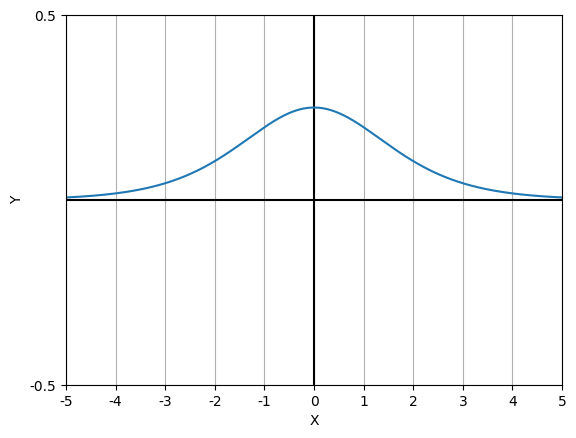

In [253]:
x = np.arange(-10, 10, 0.01)
y = sigmoid_derivative(x)

draw(x, y, 5, 0.5)

## Relu

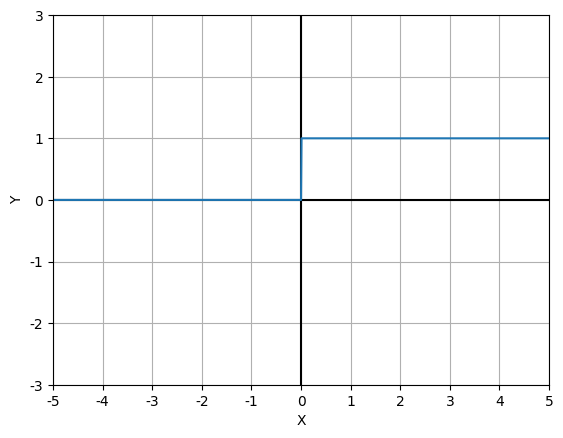

In [255]:
x = np.arange(-7, 7, 0.01)
y = relu_derivative(x)

draw(x, y, 5, 3)

## Tanh

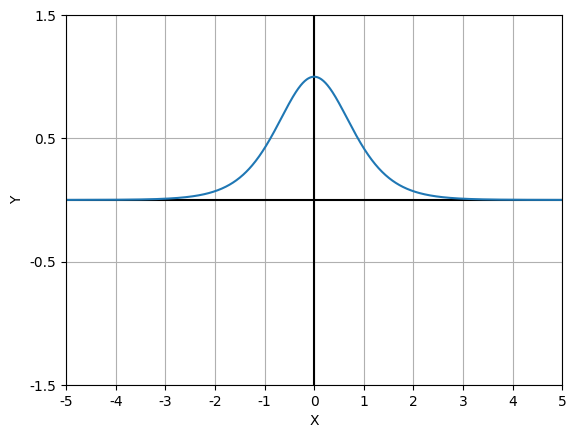

In [262]:
x = np.arange(-10, 10, 0.01)
y = tanh_derivative(x)

draw(x, y, 5, 1.5)

## Leaky Relu

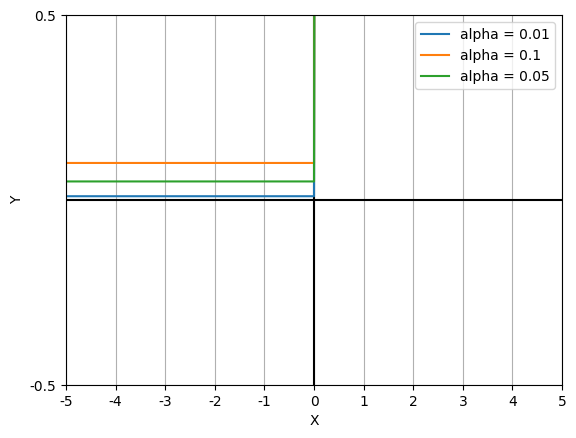

In [289]:
x = np.arange(-7, 7, 0.01)
y = leaky_relu_derivative(x, 0.01)
y_1 = leaky_relu_derivative(x, 0.1)
y_10 = leaky_relu_derivative(x, 0.05)

draw(x, [y, y_1, y_10], 5, 0.5, multi=True, label = ["alpha = 0.01", "alpha = 0.1", "alpha = 0.05"])

## Swish

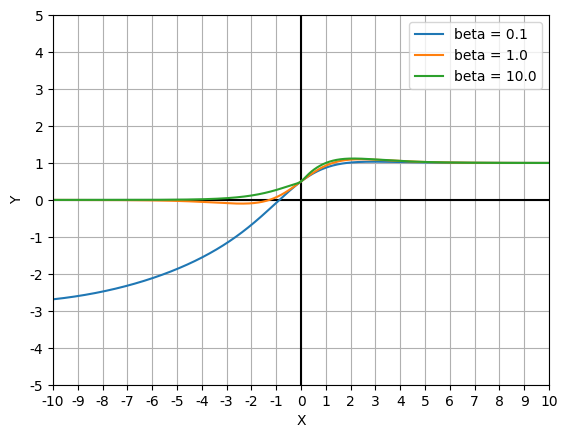

In [291]:
x = np.arange(-10, 10, 0.01)
y = swish_derivative(x, 0.1)
y_1 = swish_derivative(x, 1)
y_10 = swish_derivative(x, 10)

draw(x, [y, y_1, y_10], 10, 5, multi=True, label = ["beta = 0.1", "beta = 1.0", "beta = 10.0"])

## Elu

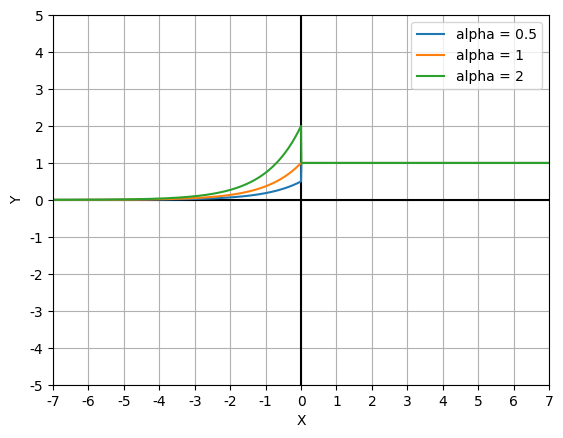

In [296]:
x = np.arange(-10, 10, 0.01)
y = elu_derivative(x, 0.5)
y_1 = elu_derivative(x, 1)
y_10 = elu_derivative(x, 2)

draw(x, [y, y_1, y_10], 7, 5, multi=True, label = ["alpha = 0.5", "alpha = 1", "alpha = 2"])

# Apply gradient descent to find minimum of a function and visualize it

## Gradient descent for random function

In [45]:
def gradient_function(x):
    return 2*x

In [138]:
def gradient_descent(gradient, start, learning_rate = 0.01, iterations = 1000, stopping_threshold = 1e-6):
    data = []
    data_ = start
    data.append(data_)
    for _ in range(iterations):
        diff = -learning_rate * gradient(data_)
        if np.all(np.abs(diff) <= stopping_threshold):
            break
        data_ += diff
        data.append(data_)
    
    X = np.arange(-10, 10, 0.1)
    plt.plot(X, np.square(X))
    plt.plot(data, np.square(data), '-o', color='red', linewidth='0.5')
    plt.ylabel("F(x)")
    plt.xlabel("x")
    plt.show()

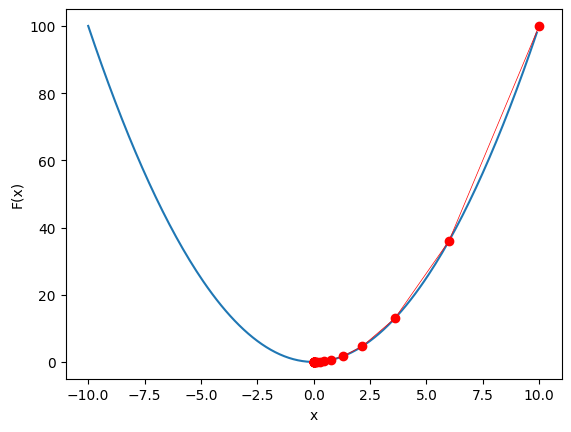

In [139]:
gradient_descent(gradient=gradient_function, start=10.0, learning_rate=0.2)

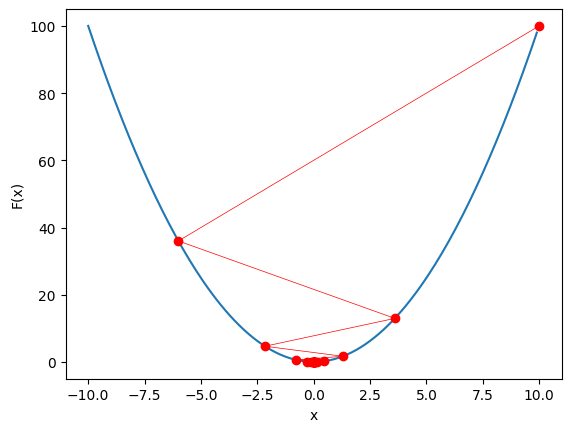

In [140]:
# Learning rate impact
gradient_descent(gradient=gradient_function, start=10.0, learning_rate=0.8)

## Gradient descent for linear regression

In [6]:
def cost_function(y, y_hat):
    return np.sum(np.square(y - y_hat)) / (2 * len(y))

In [32]:
def gradient_descent(X, y, learning_rate = 0.01, iterations = 1000, stopping_threshold = 1e-6):
    
    # Init
    theta_0 = 0.1 # Weight
    theta_1 = 0.01 # Bias
    n = float(len(X))
    
    costs = []
    weights = []
    previous_cost = None
    
     # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_hat = (theta_0 * X) + theta_1
        
        # Calculating the current cost
        current_cost = cost_function(y, y_hat)
        
        # If the change in cost is less than or equal to stopping_threshold, then stop
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break
        
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(theta_0)
        
        # Calculating the gradients
        weight_derivative = np.sum(np.multiply((y - y_hat), X)) / n
        bias_derivative = np.sum(y-y_hat) / n
        
        # Updating weights and bias
        theta_0 -= (learning_rate * weight_derivative)
        theta_1 -= (learning_rate * bias_derivative)
    
        
    # Visualizing the weights and cost at for all iterations
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return theta_0, theta_1

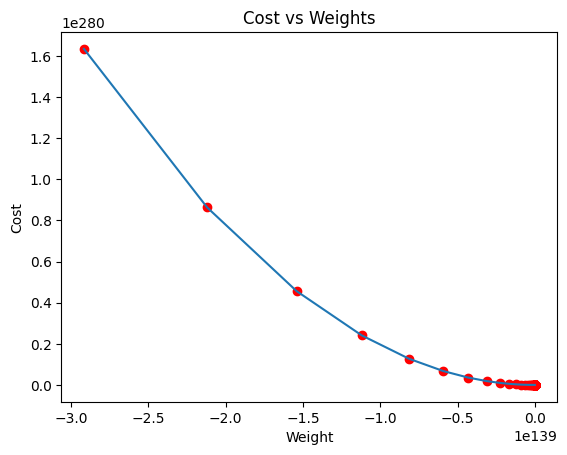

(-4.013278911700792e+139, -5.921750358762063e+138)

In [33]:
X = np.random.randint(10, size=10)
y = np.random.randint(200, size = 10)

gradient_descent(X, y)